# Titanic Dataset from Kaggle - use only train.csv for both training and test set.
Program Flow:
1. Data analysis and data visualization
2. Dataset cleaning
3. Use Scikit Learn perform logistic regression, predict
4. Use Keras implement 4 layers of DNN, perform classfication, and predict
5. Use Scikit Learn perform GridSearch on SVC
6. Use best_estimator_ from step 6 and get prediction
7. Compare result ==> SVC outform DNN and Logistic Regression

In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
plt.rcParams['patch.force_edgecolor'] = True
import seaborn as sns
%matplotlib inline

In [3]:
train = pd.read_csv('titanic_train.csv')

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
# Find out how many missing data
train.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
5,False,False,False,False,False,True,False,False,False,False,True,False
6,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,True,False
8,False,False,False,False,False,False,False,False,False,False,True,False
9,False,False,False,False,False,False,False,False,False,False,True,False


In [6]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

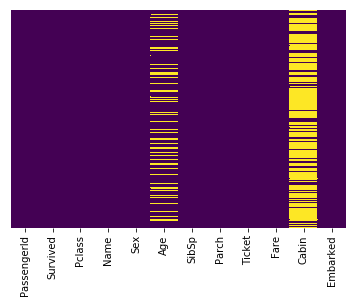

In [7]:
# Create a heap map to take look of the missing data
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

Note: missing data in 'Age' is possible for replacement. However, there are a lot data missing in 'Cabin'.

In [8]:
sns.set_style('whitegrid')

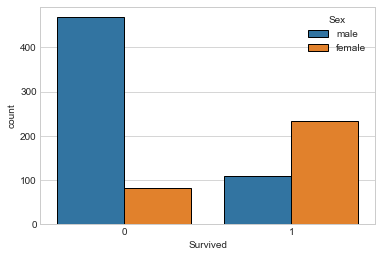

In [9]:
sns.countplot(x='Survived', hue='Sex', data=train)

Note: Female survived more than male.

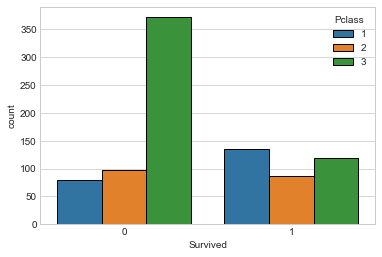

In [10]:
sns.countplot(x='Survived', hue='Pclass', data=train)

Note: a lot people from Pclass 3 were not survived.

C:\Users\HUI-YING LU\Anaconda3\envs\DL_AZ\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


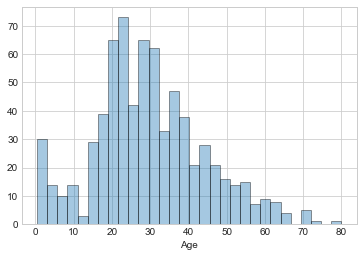

In [11]:
sns.distplot(train['Age'].dropna(), kde=False, bins=30)

In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [13]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

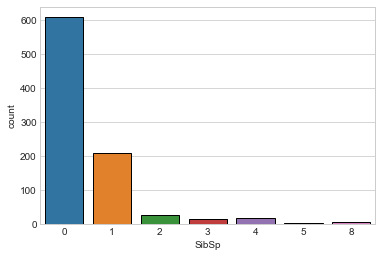

In [14]:
sns.countplot(x='SibSp', data=train)

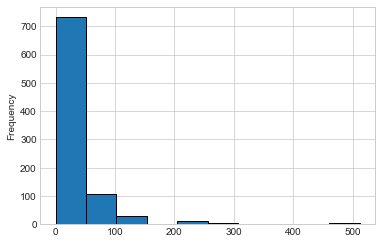

In [15]:
train['Fare'].plot.hist()

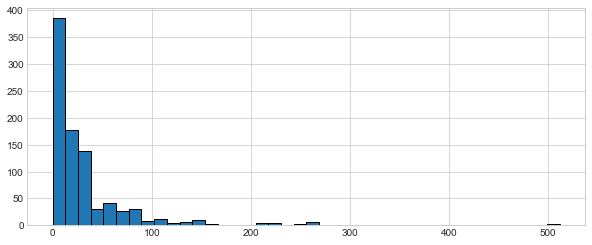

In [16]:
# Looks like a lot people buy cheap tickets (low fare)
train['Fare'].hist(bins=40, figsize=(10,4))

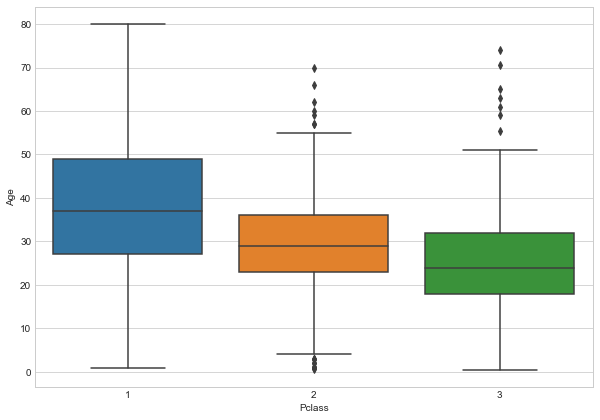

In [17]:
# Compare the age distributions across the people in 3 Pclasses.
# People in 3rd Pclass are younger.
plt.figure(figsize=(10,7))
sns.boxplot(x='Pclass', y='Age', data=train)

In [18]:
pclass1 = train[train['Pclass'] == 1]
age_p1 = pclass1['Age'].mean()

pclass2 = train[train['Pclass'] == 2]
age_p2 = pclass2['Age'].mean()

pclass3 = train[train['Pclass'] == 3]
age_p3 = pclass3['Age'].mean()

print(age_p1)
print(age_p2)
print(age_p3)

38.233440860215055
29.87763005780347
25.14061971830986


In [19]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        
        if Pclass == 1:
            return age_p1 # the middle divider line in Pclass 1
        elif Pclass == 2:
            return age_p2 # the middle divider line in Pclass 2
        else:
            return age_p3 # the middle divider line in Pclass 3
    else:
        return Age

In [20]:
train['Age'] = train[['Age', 'Pclass']].apply(impute_age, axis=1)

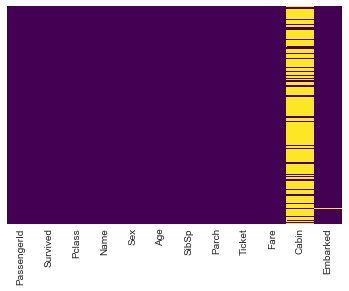

In [21]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [22]:
# Check how many missing values in train['Cabin']
train['Cabin'].isnull().sum()

687

In [23]:
# Drop 'Cabin' column since there are too many missing values
train.drop('Cabin', axis=1, inplace=True)

In [24]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00000,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00000,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00000,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00000,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.00000,0,0,373450,8.0500,S
5,6,0,3,"Moran, Mr. James",male,25.14062,0,0,330877,8.4583,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.00000,0,0,17463,51.8625,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.00000,3,1,349909,21.0750,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.00000,0,2,347742,11.1333,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.00000,1,0,237736,30.0708,C


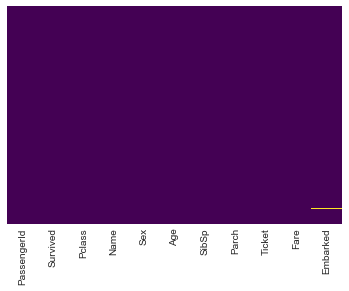

In [25]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [26]:
# Check how many missing values in 'Embarked' column
train['Embarked'].isnull().sum()

2

In [27]:
train.dropna(inplace=True)

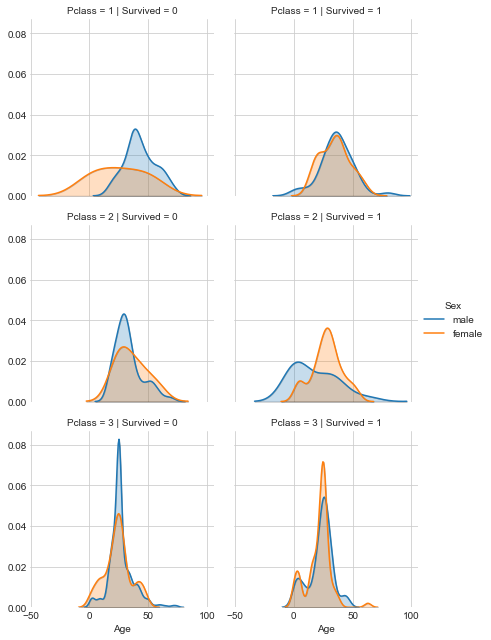

In [28]:
g = sns.FacetGrid(train, col="Survived", row="Pclass", hue="Sex", size=3)
g.map(sns.kdeplot, 'Age', shade=True)
g.add_legend()
sns.despine(left=True, bottom=True)

In [29]:
sex = pd.get_dummies(train['Sex'], drop_first=True)

In [30]:
sex

,male
0,1
1,0
2,0
3,0
4,1
5,1
6,1
7,1
8,0
9,0


In [31]:
sex.head()

,male
0,1
1,0
2,0
3,0
4,1


In [32]:
embark = pd.get_dummies(train['Embarked'], drop_first=True)

In [33]:
embark.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [34]:
train = pd.concat([train, sex, embark], axis=1)

In [35]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1


In [36]:
train.drop(['Sex', 'Embarked', 'Name', 'Ticket'], axis=1, inplace=True)

In [37]:
train

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.00000,1,0,7.2500,1,0,1
1,2,1,1,38.00000,1,0,71.2833,0,0,0
2,3,1,3,26.00000,0,0,7.9250,0,0,1
3,4,1,1,35.00000,1,0,53.1000,0,0,1
4,5,0,3,35.00000,0,0,8.0500,1,0,1
5,6,0,3,25.14062,0,0,8.4583,1,1,0
6,7,0,1,54.00000,0,0,51.8625,1,0,1
7,8,0,3,2.00000,3,1,21.0750,1,0,1
8,9,1,3,27.00000,0,2,11.1333,0,0,1
9,10,1,2,14.00000,1,0,30.0708,0,0,0


In [38]:
train.drop('PassengerId', axis=1, inplace=True)

In [39]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [40]:
X = train.drop('Survived', axis=1)

In [41]:
y = train['Survived']

In [42]:
X

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,3,22.00000,1,0,7.2500,1,0,1
1,1,38.00000,1,0,71.2833,0,0,0
2,3,26.00000,0,0,7.9250,0,0,1
3,1,35.00000,1,0,53.1000,0,0,1
4,3,35.00000,0,0,8.0500,1,0,1
5,3,25.14062,0,0,8.4583,1,1,0
6,1,54.00000,0,0,51.8625,1,0,1
7,3,2.00000,3,1,21.0750,1,0,1
8,3,27.00000,0,2,11.1333,0,0,1
9,2,14.00000,1,0,30.0708,0,0,0


In [43]:
from sklearn.model_selection import train_test_split

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [45]:
from sklearn.linear_model import LogisticRegression

In [46]:
logmodel = LogisticRegression()

In [47]:
logmodel.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [48]:
predictions = logmodel.predict(X_test)

In [49]:
logmodel.coef_

array([[-7.87200439e-01, -2.62339398e-02, -2.17656957e-01,
        -8.75523853e-02,  4.68113971e-03, -2.32173918e+00,
        -7.75987035e-04, -1.70470982e-01]])

In [50]:
from sklearn.metrics import confusion_matrix, classification_report

In [51]:
print(classification_report(y_test, predictions))

             precision    recall  f1-score   support

          0       0.80      0.91      0.85       163
          1       0.82      0.65      0.73       104

avg / total       0.81      0.81      0.80       267



In [52]:
confusion_matrix(y_test, predictions)

array([[148,  15],
       [ 36,  68]], dtype=int64)

In [53]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [54]:
X_train

array([[ 0.82581213, -0.87836968, -0.48408036, ..., -1.33296126,
        -0.30519808,  0.61327497],
       [-0.36320441, -0.87836968, -0.48408036, ..., -1.33296126,
        -0.30519808,  0.61327497],
       [ 0.82581213, -0.25572559, -0.48408036, ..., -1.33296126,
        -0.30519808,  0.61327497],
       ...,
       [ 0.82581213,  1.22305412, -0.48408036, ...,  0.75020935,
        -0.30519808,  0.61327497],
       [ 0.82581213, -0.3226116 , -0.48408036, ...,  0.75020935,
        -0.30519808, -1.63058993],
       [-0.36320441,  0.98956259, -0.48408036, ..., -1.33296126,
        -0.30519808,  0.61327497]])

In [55]:
X_test

array([[ 0.82581213, -0.3226116 , -0.48408036, ...,  0.75020935,
        -0.30519808,  0.61327497],
       [ 0.82581213, -0.3226116 , -0.48408036, ...,  0.75020935,
         3.27656055, -1.63058993],
       [-0.36320441, -0.41138661,  0.43953309, ..., -1.33296126,
        -0.30519808,  0.61327497],
       ...,
       [-0.36320441,  0.04607234, -0.48408036, ...,  0.75020935,
        -0.30519808,  0.61327497],
       [-1.55222095,  0.69640937,  0.43953309, ..., -1.33296126,
        -0.30519808,  0.61327497],
       [ 0.82581213, -1.57884428,  2.28675998, ..., -1.33296126,
        -0.30519808,  0.61327497]])

In [56]:
import keras

C:\Users\HUI-YING LU\Anaconda3\envs\DL_AZ\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [57]:
from keras.models import Sequential
from keras.layers import Dense

In [58]:
"""
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense

def build_classifier():
    classifier = Sequential()
    classifier.add(Dense(units=6, kernel_initializer='uniform', activation='relu', input_dim = 8))
    classifier.add(Dense(units=6, kernel_initializer='uniform', activation='relu'))
    classifier.add(Dense(units=6, kernel_initializer='uniform', activation='relu'))
    classifier.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))
    classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier

classifier = KerasClassifier(build_fn = build_classifier)
parameters = {'batch_size': [25, 32], 'epochs': [1500, 2000]}
grid_search = GridSearchCV(estimator = classifier, param_grid = parameters, scoring = 'accuracy')
grid_search.fit(X_train, y_train)
best_parameters = grid_search.best_params_
best_accuracy = grid_search.best_score_
print(best_parameters)
print(best_accuracy)
"""

"\nfrom keras.wrappers.scikit_learn import KerasClassifier\nfrom sklearn.model_selection import GridSearchCV\nfrom keras.models import Sequential\nfrom keras.layers import Dense\n\ndef build_classifier():\n    classifier = Sequential()\n    classifier.add(Dense(units=6, kernel_initializer='uniform', activation='relu', input_dim = 8))\n    classifier.add(Dense(units=6, kernel_initializer='uniform', activation='relu'))\n    classifier.add(Dense(units=6, kernel_initializer='uniform', activation='relu'))\n    classifier.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))\n    classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])\n    return classifier\n\nclassifier = KerasClassifier(build_fn = build_classifier)\nparameters = {'batch_size': [25, 32], 'epochs': [1500, 2000]}\ngrid_search = GridSearchCV(estimator = classifier, param_grid = parameters, scoring = 'accuracy')\ngrid_search.fit(X_train, y_train)\nbest_parameters = grid_sea

In [60]:
# Use the cell above(GridSearch) to find best batch size and epoch. Perform the classification and predict
# Using best batch size and epoch

classifier = Sequential()
# Add input layer and first hidden layer
classifier.add(Dense(units=6, kernel_initializer='uniform', activation='relu', input_dim = 8))

# Add second hidden layer, input to the hidden layer is given by previous output layer
classifier.add(Dense(units=6, kernel_initializer='uniform', activation='relu'))

# Add third hidden layer, input to the hidden layer is given by previous output layer
classifier.add(Dense(units=6, kernel_initializer='uniform', activation='relu'))

# Add the output layer, input to the hidden layer is given by previous output layer
classifier.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))

# Compile the model
classifier.compile(optimizer ='adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
# Fit the model
classifier.fit(X_train, y_train, batch_size = 32, epochs=2000)

Epoch 1/2000
622/622 [==============================] - 1s 852us/step - loss: 0.6921 - acc: 0.6158
Epoch 2/2000
622/622 [==============================] - 0s 82us/step - loss: 0.6897 - acc: 0.6206
Epoch 3/2000
622/622 [==============================] - 0s 88us/step - loss: 0.6867 - acc: 0.6206
Epoch 4/2000
622/622 [==============================] - 0s 85us/step - loss: 0.6818 - acc: 0.6206
Epoch 5/2000
622/622 [==============================] - 0s 87us/step - loss: 0.6706 - acc: 0.6206
Epoch 6/2000
622/622 [==============================] - 0s 85us/step - loss: 0.6494 - acc: 0.6206
Epoch 7/2000
622/622 [==============================] - 0s 85us/step - loss: 0.6147 - acc: 0.6206
Epoch 8/2000
622/622 [==============================] - 0s 85us/step - loss: 0.5775 - acc: 0.6206
Epoch 9/2000
622/622 [==============================] - 0s 90us/step - loss: 0.5488 - acc: 0.6206
Epoch 10/2000
622/622 [==============================] - 0s 87us/step - loss: 0.5331 - acc: 0.7460
Epoch 11/2000
622/

622/622 [==============================] - 0s 82us/step - loss: 0.4132 - acc: 0.8215
Epoch 84/2000
622/622 [==============================] - 0s 82us/step - loss: 0.4131 - acc: 0.8248
Epoch 85/2000
622/622 [==============================] - 0s 84us/step - loss: 0.4126 - acc: 0.8248
Epoch 86/2000
622/622 [==============================] - 0s 85us/step - loss: 0.4121 - acc: 0.8215
Epoch 87/2000
622/622 [==============================] - 0s 88us/step - loss: 0.4124 - acc: 0.8215
Epoch 88/2000
622/622 [==============================] - 0s 84us/step - loss: 0.4127 - acc: 0.8280
Epoch 89/2000
622/622 [==============================] - 0s 80us/step - loss: 0.4118 - acc: 0.8215
Epoch 90/2000
622/622 [==============================] - 0s 84us/step - loss: 0.4121 - acc: 0.8199
Epoch 91/2000
622/622 [==============================] - 0s 84us/step - loss: 0.4119 - acc: 0.8248
Epoch 92/2000
622/622 [==============================] - 0s 96us/step - loss: 0.4115 - acc: 0.8232
Epoch 93/2000
622/622 [=

622/622 [==============================] - 0s 88us/step - loss: 0.4028 - acc: 0.8328
Epoch 166/2000
622/622 [==============================] - 0s 95us/step - loss: 0.4043 - acc: 0.8167
Epoch 167/2000
622/622 [==============================] - 0s 96us/step - loss: 0.4031 - acc: 0.8264
Epoch 168/2000
622/622 [==============================] - 0s 96us/step - loss: 0.4025 - acc: 0.8312
Epoch 169/2000
622/622 [==============================] - 0s 88us/step - loss: 0.4025 - acc: 0.8296
Epoch 170/2000
622/622 [==============================] - 0s 85us/step - loss: 0.4034 - acc: 0.8264
Epoch 171/2000
622/622 [==============================] - 0s 88us/step - loss: 0.4029 - acc: 0.8328
Epoch 172/2000
622/622 [==============================] - 0s 88us/step - loss: 0.4026 - acc: 0.8296
Epoch 173/2000
622/622 [==============================] - 0s 97us/step - loss: 0.4029 - acc: 0.8215
Epoch 174/2000
622/622 [==============================] - 0s 87us/step - loss: 0.4021 - acc: 0.8296
Epoch 175/2000


622/622 [==============================] - 0s 87us/step - loss: 0.3955 - acc: 0.8296
Epoch 247/2000
622/622 [==============================] - 0s 85us/step - loss: 0.3944 - acc: 0.8328
Epoch 248/2000
622/622 [==============================] - 0s 87us/step - loss: 0.3950 - acc: 0.8344
Epoch 249/2000
622/622 [==============================] - 0s 93us/step - loss: 0.3950 - acc: 0.8328
Epoch 250/2000
622/622 [==============================] - 0s 85us/step - loss: 0.3945 - acc: 0.8392
Epoch 251/2000
622/622 [==============================] - 0s 87us/step - loss: 0.3947 - acc: 0.8360
Epoch 252/2000
622/622 [==============================] - 0s 100us/step - loss: 0.3943 - acc: 0.8344
Epoch 253/2000
622/622 [==============================] - 0s 106us/step - loss: 0.3943 - acc: 0.8312
Epoch 254/2000
622/622 [==============================] - 0s 106us/step - loss: 0.3947 - acc: 0.8360
Epoch 255/2000
622/622 [==============================] - 0s 114us/step - loss: 0.3937 - acc: 0.8360
Epoch 256/2

622/622 [==============================] - 0s 87us/step - loss: 0.3908 - acc: 0.8328
Epoch 328/2000
622/622 [==============================] - 0s 84us/step - loss: 0.3906 - acc: 0.8328
Epoch 329/2000
622/622 [==============================] - 0s 87us/step - loss: 0.3907 - acc: 0.8344
Epoch 330/2000
622/622 [==============================] - 0s 88us/step - loss: 0.3905 - acc: 0.8328
Epoch 331/2000
622/622 [==============================] - 0s 85us/step - loss: 0.3908 - acc: 0.8344
Epoch 332/2000
622/622 [==============================] - 0s 92us/step - loss: 0.3901 - acc: 0.8360
Epoch 333/2000
622/622 [==============================] - 0s 93us/step - loss: 0.3904 - acc: 0.8360
Epoch 334/2000
622/622 [==============================] - 0s 92us/step - loss: 0.3908 - acc: 0.8328
Epoch 335/2000
622/622 [==============================] - 0s 100us/step - loss: 0.3899 - acc: 0.8344
Epoch 336/2000
622/622 [==============================] - 0s 98us/step - loss: 0.3912 - acc: 0.8360
Epoch 337/2000

Epoch 409/2000
622/622 [==============================] - 0s 85us/step - loss: 0.3877 - acc: 0.8344
Epoch 410/2000
622/622 [==============================] - 0s 88us/step - loss: 0.3877 - acc: 0.8344
Epoch 411/2000
622/622 [==============================] - 0s 84us/step - loss: 0.3875 - acc: 0.8376
Epoch 412/2000
622/622 [==============================] - 0s 93us/step - loss: 0.3885 - acc: 0.8360
Epoch 413/2000
622/622 [==============================] - 0s 82us/step - loss: 0.3877 - acc: 0.8344
Epoch 414/2000
622/622 [==============================] - 0s 90us/step - loss: 0.3892 - acc: 0.8376
Epoch 415/2000
622/622 [==============================] - 0s 84us/step - loss: 0.3887 - acc: 0.8360
Epoch 416/2000
622/622 [==============================] - 0s 88us/step - loss: 0.3876 - acc: 0.8376
Epoch 417/2000
622/622 [==============================] - 0s 80us/step - loss: 0.3874 - acc: 0.8344
Epoch 418/2000
622/622 [==============================] - 0s 85us/step - loss: 0.3872 - acc: 0.8408


622/622 [==============================] - 0s 95us/step - loss: 0.3849 - acc: 0.8424
Epoch 491/2000
622/622 [==============================] - 0s 101us/step - loss: 0.3848 - acc: 0.8408
Epoch 492/2000
622/622 [==============================] - 0s 103us/step - loss: 0.3863 - acc: 0.8360
Epoch 493/2000
622/622 [==============================] - 0s 111us/step - loss: 0.3847 - acc: 0.8392
Epoch 494/2000
622/622 [==============================] - 0s 125us/step - loss: 0.3850 - acc: 0.8376
Epoch 495/2000
622/622 [==============================] - 0s 122us/step - loss: 0.3849 - acc: 0.8376
Epoch 496/2000
622/622 [==============================] - 0s 132us/step - loss: 0.3846 - acc: 0.8392
Epoch 497/2000
622/622 [==============================] - 0s 105us/step - loss: 0.3855 - acc: 0.8392
Epoch 498/2000
622/622 [==============================] - 0s 92us/step - loss: 0.3845 - acc: 0.8392
Epoch 499/2000
622/622 [==============================] - 0s 108us/step - loss: 0.3853 - acc: 0.8376
Epoch 5

622/622 [==============================] - 0s 84us/step - loss: 0.3800 - acc: 0.8408
Epoch 572/2000
622/622 [==============================] - 0s 85us/step - loss: 0.3819 - acc: 0.8392
Epoch 573/2000
622/622 [==============================] - 0s 84us/step - loss: 0.3803 - acc: 0.8408
Epoch 574/2000
622/622 [==============================] - 0s 79us/step - loss: 0.3812 - acc: 0.8376
Epoch 575/2000
622/622 [==============================] - 0s 84us/step - loss: 0.3804 - acc: 0.8408
Epoch 576/2000
622/622 [==============================] - 0s 84us/step - loss: 0.3800 - acc: 0.8441
Epoch 577/2000
622/622 [==============================] - 0s 98us/step - loss: 0.3802 - acc: 0.8376
Epoch 578/2000
622/622 [==============================] - 0s 84us/step - loss: 0.3799 - acc: 0.8441
Epoch 579/2000
622/622 [==============================] - 0s 85us/step - loss: 0.3803 - acc: 0.8424
Epoch 580/2000
622/622 [==============================] - 0s 85us/step - loss: 0.3807 - acc: 0.8376
Epoch 581/2000


622/622 [==============================] - 0s 88us/step - loss: 0.3773 - acc: 0.8537
Epoch 654/2000
622/622 [==============================] - 0s 84us/step - loss: 0.3778 - acc: 0.8521
Epoch 655/2000
622/622 [==============================] - 0s 87us/step - loss: 0.3777 - acc: 0.8505
Epoch 656/2000
622/622 [==============================] - 0s 85us/step - loss: 0.3776 - acc: 0.8521
Epoch 657/2000
622/622 [==============================] - 0s 82us/step - loss: 0.3784 - acc: 0.8473
Epoch 658/2000
622/622 [==============================] - 0s 84us/step - loss: 0.3780 - acc: 0.8505
Epoch 659/2000
622/622 [==============================] - 0s 89us/step - loss: 0.3787 - acc: 0.8521
Epoch 660/2000
622/622 [==============================] - 0s 85us/step - loss: 0.3773 - acc: 0.8537
Epoch 661/2000
622/622 [==============================] - 0s 93us/step - loss: 0.3774 - acc: 0.8489
Epoch 662/2000
622/622 [==============================] - 0s 87us/step - loss: 0.3776 - acc: 0.8537
Epoch 663/2000


622/622 [==============================] - 0s 80us/step - loss: 0.3737 - acc: 0.8521
Epoch 736/2000
622/622 [==============================] - 0s 80us/step - loss: 0.3741 - acc: 0.8521
Epoch 737/2000
622/622 [==============================] - 0s 82us/step - loss: 0.3743 - acc: 0.8537
Epoch 738/2000
622/622 [==============================] - 0s 84us/step - loss: 0.3745 - acc: 0.8537
Epoch 739/2000
622/622 [==============================] - 0s 82us/step - loss: 0.3747 - acc: 0.8537
Epoch 740/2000
622/622 [==============================] - 0s 84us/step - loss: 0.3750 - acc: 0.8537
Epoch 741/2000
622/622 [==============================] - 0s 85us/step - loss: 0.3740 - acc: 0.8521
Epoch 742/2000
622/622 [==============================] - 0s 87us/step - loss: 0.3732 - acc: 0.8505
Epoch 743/2000
622/622 [==============================] - 0s 82us/step - loss: 0.3741 - acc: 0.8521
Epoch 744/2000
622/622 [==============================] - 0s 84us/step - loss: 0.3733 - acc: 0.8537
Epoch 745/2000


Epoch 817/2000
622/622 [==============================] - 0s 82us/step - loss: 0.3717 - acc: 0.8489
Epoch 818/2000
622/622 [==============================] - 0s 84us/step - loss: 0.3690 - acc: 0.8521
Epoch 819/2000
622/622 [==============================] - 0s 80us/step - loss: 0.3694 - acc: 0.8505
Epoch 820/2000
622/622 [==============================] - 0s 79us/step - loss: 0.3714 - acc: 0.8521
Epoch 821/2000
622/622 [==============================] - 0s 84us/step - loss: 0.3712 - acc: 0.8521
Epoch 822/2000
622/622 [==============================] - 0s 85us/step - loss: 0.3695 - acc: 0.8489
Epoch 823/2000
622/622 [==============================] - 0s 84us/step - loss: 0.3688 - acc: 0.8489
Epoch 824/2000
622/622 [==============================] - 0s 85us/step - loss: 0.3687 - acc: 0.8521
Epoch 825/2000
622/622 [==============================] - 0s 92us/step - loss: 0.3701 - acc: 0.8473
Epoch 826/2000
622/622 [==============================] - 0s 93us/step - loss: 0.3692 - acc: 0.8521


622/622 [==============================] - 0s 82us/step - loss: 0.3663 - acc: 0.8521
Epoch 899/2000
622/622 [==============================] - 0s 80us/step - loss: 0.3663 - acc: 0.8505
Epoch 900/2000
622/622 [==============================] - 0s 80us/step - loss: 0.3663 - acc: 0.8553
Epoch 901/2000
622/622 [==============================] - 0s 82us/step - loss: 0.3677 - acc: 0.8521
Epoch 902/2000
622/622 [==============================] - 0s 87us/step - loss: 0.3661 - acc: 0.8521
Epoch 903/2000
622/622 [==============================] - 0s 87us/step - loss: 0.3659 - acc: 0.8489
Epoch 904/2000
622/622 [==============================] - 0s 85us/step - loss: 0.3672 - acc: 0.8569
Epoch 905/2000
622/622 [==============================] - 0s 84us/step - loss: 0.3654 - acc: 0.8537
Epoch 906/2000
622/622 [==============================] - 0s 82us/step - loss: 0.3650 - acc: 0.8521
Epoch 907/2000
622/622 [==============================] - 0s 84us/step - loss: 0.3659 - acc: 0.8505
Epoch 908/2000


622/622 [==============================] - 0s 84us/step - loss: 0.3631 - acc: 0.8537
Epoch 981/2000
622/622 [==============================] - 0s 87us/step - loss: 0.3624 - acc: 0.8585
Epoch 982/2000
622/622 [==============================] - 0s 82us/step - loss: 0.3641 - acc: 0.8521
Epoch 983/2000
622/622 [==============================] - 0s 82us/step - loss: 0.3626 - acc: 0.8537
Epoch 984/2000
622/622 [==============================] - 0s 82us/step - loss: 0.3642 - acc: 0.8633
Epoch 985/2000
622/622 [==============================] - 0s 84us/step - loss: 0.3633 - acc: 0.8553
Epoch 986/2000
622/622 [==============================] - 0s 84us/step - loss: 0.3637 - acc: 0.8585
Epoch 987/2000
622/622 [==============================] - 0s 82us/step - loss: 0.3638 - acc: 0.8537
Epoch 988/2000
622/622 [==============================] - 0s 80us/step - loss: 0.3634 - acc: 0.8553
Epoch 989/2000
622/622 [==============================] - 0s 84us/step - loss: 0.3638 - acc: 0.8537
Epoch 990/2000


622/622 [==============================] - 0s 87us/step - loss: 0.3613 - acc: 0.8569
Epoch 1062/2000
622/622 [==============================] - 0s 90us/step - loss: 0.3629 - acc: 0.8521
Epoch 1063/2000
622/622 [==============================] - 0s 105us/step - loss: 0.3636 - acc: 0.8585
Epoch 1064/2000
622/622 [==============================] - 0s 90us/step - loss: 0.3629 - acc: 0.8537
Epoch 1065/2000
622/622 [==============================] - 0s 106us/step - loss: 0.3622 - acc: 0.8569
Epoch 1066/2000
622/622 [==============================] - 0s 119us/step - loss: 0.3612 - acc: 0.8601
Epoch 1067/2000
622/622 [==============================] - 0s 116us/step - loss: 0.3616 - acc: 0.8601
Epoch 1068/2000
622/622 [==============================] - 0s 111us/step - loss: 0.3609 - acc: 0.8569
Epoch 1069/2000
622/622 [==============================] - 0s 105us/step - loss: 0.3604 - acc: 0.8585
Epoch 1070/2000
622/622 [==============================] - 0s 113us/step - loss: 0.3620 - acc: 0.8617

622/622 [==============================] - 0s 75us/step - loss: 0.3593 - acc: 0.8585
Epoch 1143/2000
622/622 [==============================] - 0s 102us/step - loss: 0.3612 - acc: 0.8537
Epoch 1144/2000
622/622 [==============================] - 0s 80us/step - loss: 0.3598 - acc: 0.8569
Epoch 1145/2000
622/622 [==============================] - 0s 88us/step - loss: 0.3600 - acc: 0.8569
Epoch 1146/2000
622/622 [==============================] - 0s 88us/step - loss: 0.3603 - acc: 0.8569
Epoch 1147/2000
622/622 [==============================] - 0s 84us/step - loss: 0.3597 - acc: 0.8617
Epoch 1148/2000
622/622 [==============================] - 0s 87us/step - loss: 0.3594 - acc: 0.8585
Epoch 1149/2000
622/622 [==============================] - 0s 88us/step - loss: 0.3597 - acc: 0.8585
Epoch 1150/2000
622/622 [==============================] - 0s 90us/step - loss: 0.3603 - acc: 0.8585
Epoch 1151/2000
622/622 [==============================] - 0s 85us/step - loss: 0.3606 - acc: 0.8537
Epoch

622/622 [==============================] - 0s 84us/step - loss: 0.3566 - acc: 0.8553
Epoch 1224/2000
622/622 [==============================] - 0s 84us/step - loss: 0.3576 - acc: 0.8585
Epoch 1225/2000
622/622 [==============================] - 0s 82us/step - loss: 0.3565 - acc: 0.8585
Epoch 1226/2000
622/622 [==============================] - 0s 82us/step - loss: 0.3568 - acc: 0.8601
Epoch 1227/2000
622/622 [==============================] - 0s 82us/step - loss: 0.3569 - acc: 0.8601
Epoch 1228/2000
622/622 [==============================] - 0s 82us/step - loss: 0.3579 - acc: 0.8489
Epoch 1229/2000
622/622 [==============================] - 0s 80us/step - loss: 0.3551 - acc: 0.8617
Epoch 1230/2000
622/622 [==============================] - 0s 84us/step - loss: 0.3579 - acc: 0.8553
Epoch 1231/2000
622/622 [==============================] - 0s 80us/step - loss: 0.3566 - acc: 0.8553
Epoch 1232/2000
622/622 [==============================] - 0s 81us/step - loss: 0.3561 - acc: 0.8585
Epoch 

622/622 [==============================] - 0s 84us/step - loss: 0.3555 - acc: 0.8617
Epoch 1305/2000
622/622 [==============================] - 0s 85us/step - loss: 0.3560 - acc: 0.8585
Epoch 1306/2000
622/622 [==============================] - 0s 85us/step - loss: 0.3551 - acc: 0.8553
Epoch 1307/2000
622/622 [==============================] - 0s 84us/step - loss: 0.3557 - acc: 0.8601
Epoch 1308/2000
622/622 [==============================] - 0s 80us/step - loss: 0.3569 - acc: 0.8601
Epoch 1309/2000
622/622 [==============================] - 0s 82us/step - loss: 0.3579 - acc: 0.8505
Epoch 1310/2000
622/622 [==============================] - 0s 85us/step - loss: 0.3581 - acc: 0.8601
Epoch 1311/2000
622/622 [==============================] - 0s 85us/step - loss: 0.3547 - acc: 0.8650
Epoch 1312/2000
622/622 [==============================] - 0s 87us/step - loss: 0.3570 - acc: 0.8521
Epoch 1313/2000
622/622 [==============================] - 0s 82us/step - loss: 0.3548 - acc: 0.8585
Epoch 

622/622 [==============================] - 0s 82us/step - loss: 0.3536 - acc: 0.8633
Epoch 1386/2000
622/622 [==============================] - 0s 82us/step - loss: 0.3532 - acc: 0.8585
Epoch 1387/2000
622/622 [==============================] - 0s 84us/step - loss: 0.3536 - acc: 0.8650
Epoch 1388/2000
622/622 [==============================] - 0s 84us/step - loss: 0.3556 - acc: 0.8553
Epoch 1389/2000
622/622 [==============================] - 0s 80us/step - loss: 0.3531 - acc: 0.8569
Epoch 1390/2000
622/622 [==============================] - 0s 85us/step - loss: 0.3542 - acc: 0.8569
Epoch 1391/2000
622/622 [==============================] - 0s 85us/step - loss: 0.3544 - acc: 0.8601
Epoch 1392/2000
622/622 [==============================] - 0s 84us/step - loss: 0.3552 - acc: 0.8585
Epoch 1393/2000
622/622 [==============================] - 0s 82us/step - loss: 0.3541 - acc: 0.8633
Epoch 1394/2000
622/622 [==============================] - 0s 84us/step - loss: 0.3526 - acc: 0.8537
Epoch 

622/622 [==============================] - 0s 82us/step - loss: 0.3523 - acc: 0.8553
Epoch 1466/2000
622/622 [==============================] - 0s 82us/step - loss: 0.3524 - acc: 0.8585
Epoch 1467/2000
622/622 [==============================] - 0s 84us/step - loss: 0.3547 - acc: 0.8553
Epoch 1468/2000
622/622 [==============================] - 0s 84us/step - loss: 0.3535 - acc: 0.8617
Epoch 1469/2000
622/622 [==============================] - 0s 79us/step - loss: 0.3546 - acc: 0.8521
Epoch 1470/2000
622/622 [==============================] - 0s 84us/step - loss: 0.3562 - acc: 0.8553
Epoch 1471/2000
622/622 [==============================] - 0s 85us/step - loss: 0.3536 - acc: 0.8633
Epoch 1472/2000
622/622 [==============================] - 0s 85us/step - loss: 0.3549 - acc: 0.8473
Epoch 1473/2000
622/622 [==============================] - 0s 85us/step - loss: 0.3525 - acc: 0.8521
Epoch 1474/2000
622/622 [==============================] - 0s 82us/step - loss: 0.3542 - acc: 0.8553
Epoch 

622/622 [==============================] - 0s 84us/step - loss: 0.3529 - acc: 0.8650
Epoch 1547/2000
622/622 [==============================] - 0s 84us/step - loss: 0.3531 - acc: 0.8585
Epoch 1548/2000
622/622 [==============================] - 0s 80us/step - loss: 0.3522 - acc: 0.8617
Epoch 1549/2000
622/622 [==============================] - 0s 81us/step - loss: 0.3511 - acc: 0.8601
Epoch 1550/2000
622/622 [==============================] - 0s 82us/step - loss: 0.3524 - acc: 0.8537
Epoch 1551/2000
622/622 [==============================] - 0s 95us/step - loss: 0.3520 - acc: 0.8569
Epoch 1552/2000
622/622 [==============================] - 0s 80us/step - loss: 0.3530 - acc: 0.8457
Epoch 1553/2000
622/622 [==============================] - 0s 82us/step - loss: 0.3507 - acc: 0.8633
Epoch 1554/2000
622/622 [==============================] - 0s 82us/step - loss: 0.3510 - acc: 0.8633
Epoch 1555/2000
622/622 [==============================] - 0s 82us/step - loss: 0.3530 - acc: 0.8537
Epoch 

622/622 [==============================] - 0s 103us/step - loss: 0.3517 - acc: 0.8505
Epoch 1627/2000
622/622 [==============================] - 0s 106us/step - loss: 0.3547 - acc: 0.8585
Epoch 1628/2000
622/622 [==============================] - 0s 106us/step - loss: 0.3505 - acc: 0.8601
Epoch 1629/2000
622/622 [==============================] - 0s 103us/step - loss: 0.3523 - acc: 0.8521
Epoch 1630/2000
622/622 [==============================] - 0s 119us/step - loss: 0.3504 - acc: 0.8601
Epoch 1631/2000
622/622 [==============================] - 0s 119us/step - loss: 0.3495 - acc: 0.8617
Epoch 1632/2000
622/622 [==============================] - 0s 108us/step - loss: 0.3519 - acc: 0.8617
Epoch 1633/2000
622/622 [==============================] - 0s 109us/step - loss: 0.3509 - acc: 0.8585
Epoch 1634/2000
622/622 [==============================] - 0s 108us/step - loss: 0.3504 - acc: 0.8633
Epoch 1635/2000
622/622 [==============================] - 0s 98us/step - loss: 0.3505 - acc: 0.85

622/622 [==============================] - 0s 79us/step - loss: 0.3483 - acc: 0.8601
Epoch 1707/2000
622/622 [==============================] - 0s 80us/step - loss: 0.3493 - acc: 0.8537
Epoch 1708/2000
622/622 [==============================] - 0s 79us/step - loss: 0.3483 - acc: 0.8601
Epoch 1709/2000
622/622 [==============================] - 0s 80us/step - loss: 0.3490 - acc: 0.8617
Epoch 1710/2000
622/622 [==============================] - 0s 80us/step - loss: 0.3499 - acc: 0.8601
Epoch 1711/2000
622/622 [==============================] - 0s 84us/step - loss: 0.3542 - acc: 0.8569
Epoch 1712/2000
622/622 [==============================] - 0s 79us/step - loss: 0.3488 - acc: 0.8585
Epoch 1713/2000
622/622 [==============================] - 0s 79us/step - loss: 0.3492 - acc: 0.8633
Epoch 1714/2000
622/622 [==============================] - 0s 80us/step - loss: 0.3496 - acc: 0.8569
Epoch 1715/2000
622/622 [==============================] - 0s 84us/step - loss: 0.3485 - acc: 0.8682
Epoch 

622/622 [==============================] - 0s 85us/step - loss: 0.3477 - acc: 0.8569
Epoch 1788/2000
622/622 [==============================] - 0s 84us/step - loss: 0.3472 - acc: 0.8617
Epoch 1789/2000
622/622 [==============================] - 0s 85us/step - loss: 0.3477 - acc: 0.8601
Epoch 1790/2000
622/622 [==============================] - 0s 87us/step - loss: 0.3476 - acc: 0.8633
Epoch 1791/2000
622/622 [==============================] - 0s 84us/step - loss: 0.3461 - acc: 0.8617
Epoch 1792/2000
622/622 [==============================] - 0s 85us/step - loss: 0.3463 - acc: 0.8601
Epoch 1793/2000
622/622 [==============================] - 0s 84us/step - loss: 0.3475 - acc: 0.8601
Epoch 1794/2000
622/622 [==============================] - 0s 87us/step - loss: 0.3463 - acc: 0.8617
Epoch 1795/2000
622/622 [==============================] - 0s 98us/step - loss: 0.3459 - acc: 0.8666
Epoch 1796/2000
622/622 [==============================] - 0s 100us/step - loss: 0.3459 - acc: 0.8650
Epoch

622/622 [==============================] - 0s 70us/step - loss: 0.3463 - acc: 0.8569
Epoch 1868/2000
622/622 [==============================] - 0s 75us/step - loss: 0.3447 - acc: 0.8650
Epoch 1869/2000
622/622 [==============================] - 0s 100us/step - loss: 0.3434 - acc: 0.8666
Epoch 1870/2000
622/622 [==============================] - 0s 83us/step - loss: 0.3424 - acc: 0.8666
Epoch 1871/2000
622/622 [==============================] - 0s 84us/step - loss: 0.3451 - acc: 0.8585
Epoch 1872/2000
622/622 [==============================] - 0s 58us/step - loss: 0.3422 - acc: 0.8682
Epoch 1873/2000
622/622 [==============================] - 0s 75us/step - loss: 0.3433 - acc: 0.8585
Epoch 1874/2000
622/622 [==============================] - 0s 75us/step - loss: 0.3442 - acc: 0.8714
Epoch 1875/2000
622/622 [==============================] - 0s 106us/step - loss: 0.3447 - acc: 0.8617
Epoch 1876/2000
622/622 [==============================] - 0s 84us/step - loss: 0.3436 - acc: 0.8601
Epoc

Epoch 1948/2000
622/622 [==============================] - 0s 81us/step - loss: 0.3425 - acc: 0.8650
Epoch 1949/2000
622/622 [==============================] - 0s 78us/step - loss: 0.3426 - acc: 0.8537
Epoch 1950/2000
622/622 [==============================] - 0s 106us/step - loss: 0.3444 - acc: 0.8585
Epoch 1951/2000
622/622 [==============================] - 0s 135us/step - loss: 0.3423 - acc: 0.8650
Epoch 1952/2000
622/622 [==============================] - 0s 78us/step - loss: 0.3407 - acc: 0.8601
Epoch 1953/2000
622/622 [==============================] - 0s 99us/step - loss: 0.3431 - acc: 0.8617
Epoch 1954/2000
622/622 [==============================] - 0s 106us/step - loss: 0.3469 - acc: 0.8553
Epoch 1955/2000
622/622 [==============================] - 0s 124us/step - loss: 0.3453 - acc: 0.8521
Epoch 1956/2000
622/622 [==============================] - 0s 88us/step - loss: 0.3422 - acc: 0.8633
Epoch 1957/2000
622/622 [==============================] - 0s 75us/step - loss: 0.3422 

In [61]:
# Predicting the Test set results ==> the output is probability, not binary
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

In [62]:
print(confusion_matrix(y_test, y_pred))
print()
print(classification_report(y_test, y_pred))

[[145  18]
 [ 28  76]]

             precision    recall  f1-score   support

          0       0.84      0.89      0.86       163
          1       0.81      0.73      0.77       104

avg / total       0.83      0.83      0.83       267



In [63]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

In [64]:
param_grid = {
    'C': [1, 10, 100, 1e3],
    'gamma': [0.0001, 0.001, 0.01, 0.1],
    'kernel' : ['rbf', 'linear']
}

# for sklearn version 0.16 or prior, the class_weight parameter value is 'auto'
clf = GridSearchCV(SVC(), param_grid)
clf = clf.fit(X_train, y_train)

print("Best estimator found by grid search:")
print(clf.best_estimator_)

Best estimator found by grid search:
SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


In [66]:
best_estimator = clf.best_estimator_
clf_predictions = best_estimator.predict(X_test)

In [67]:
print(confusion_matrix(y_test, clf_predictions))
print("\n")
print(classification_report(y_test, clf_predictions))

[[157   6]
 [ 35  69]]


             precision    recall  f1-score   support

          0       0.82      0.96      0.88       163
          1       0.92      0.66      0.77       104

avg / total       0.86      0.85      0.84       267



## Conclusion: 
SVC output perform DNN, and DNN is better than Logistic Regression!